In [1]:
%pylab inline
import scipy.constants as ct
import tkinter.messagebox
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


Define few constants and functions

In [2]:
g = 1
m_b = ct.value('Bohr magneton')
m_Tm = 169 * ct.value('atomic mass constant')


In [3]:
def cloud_expansion(t, T, r0, t0):
    r'np.sqrt(r0**2 + 2 * k_b * T * (t + 1*t0)**2 / m)'
    k_b = 1.38e-23
    m = 169 * 1.66e-27
    return np.sqrt(r0**2 + 2 * k_b * T * (t + 1*t0)**2 / m)
def gaussian(x,N,x0,sigma, background):
    """Returns value of a 1D-gaussian with the given parameters"""
    #from numpy import sqrt,pi,exp
    return N / (sigma * sqrt(pi)) * exp(-(x - x0)**2/(sigma**2)) + background
def st_g_exp(t,m,dB):
    return g*m_b*dB*m/m_Tm * t**2/2
def st_g_exp_growing_dB(t,m,dB_max,tau=3e-3):
    """returns cloud displacement depending on t and m at exponentially growing magnetic field 
    with time constant tau - integrated with scypy in the end of this notebook"""
    return g*m_b*dB_max*m/m_Tm * (t**2/2 - t*tau + tau**2 - tau**2*exp(-t/tau))

### From here starts new part with 2D-images
Первые попытки перенесены в конец файла

In [4]:
def gaussian2D(N, x0, y0, sigma_x, sigma_y, background):
    """Returns a 2D-gaussian function with the given parameters"""
    #from numpy import pi,exp
    sigma_x = float(sigma_x)
    sigma_y = float(sigma_y)
    return lambda x,y: N / (sigma_x * sigma_y  * pi) * exp(
                        -(((x - x0) / sigma_x)**2 + ((y - y0) / sigma_y)**2)) + background

Camera dimensions and greed parameters

In [5]:
z_max = 516*22.3/2
x_max = 696*22.3/2
zz = linspace(0,+z_max,400)
xx = linspace(0,+x_max,400)
xv,zv = meshgrid(xx,zz)
ms = arange(-4,5)
# yy1 = gaussian2D(1,0,0,3,3,0)(xv,zv) + gaussian2D(1,0,6,3,3,0)(xv,zv)

### Single picture

(0, 400)

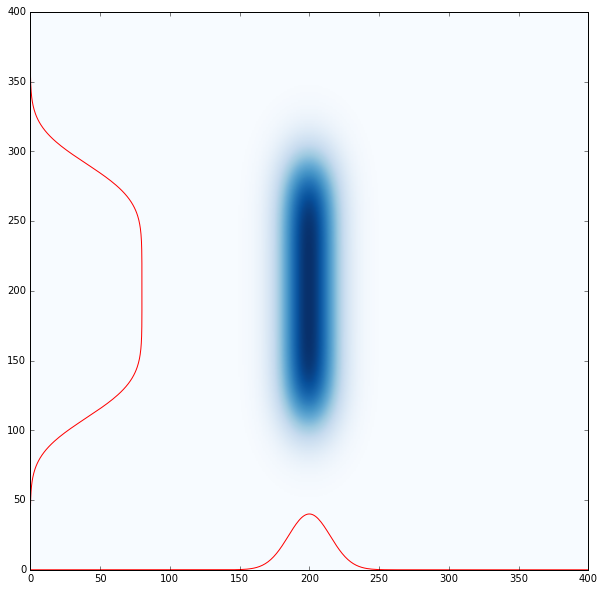

In [53]:
#     dB - gradient in G/cm, T - temperature in uK, t_f - time in ms
# figsize(20,10)
# fig, ax = subplots()
#     t = linspace(0,t_f,t_f)
#     displacement = st_g_exp(t*1e-3, 1, dB*1e-2)*1e6
fig, ax = plt.subplots(figsize=(10,10))
r0_x = 300*1e-6
r0_z = 200*1e-6
T_x = 10
T_z = 20
t = 9
dB = 40
cloud_radius_x = cloud_expansion(t*1e-3, T_x*1e-6,r0_x,0)*1e6
cloud_radius_z = cloud_expansion(t*1e-3, T_z*1e-6,r0_z,0)*1e6
#     free_fall = ct.g * t**2/2
#     plot(t,cloud_radius,'r',label='radius')
#     plot(t,displacement,'b',label='distance')
#     plot(t,free_fall,'k--')
yy = zeros_like(xv)
# for noisy image
# yy += np.random.rand(*yy.shape)*1*1e-3
# axvline(-2500,c='k')
# axvline(2500,c='k')

for m in ms:
    pos = st_g_exp_growing_dB(t*1e-3, m, dB*1e-2)*1e6# +ct.g * t**2/2 
    yy += gaussian2D(1000./(2),x_max/2,z_max/2+pos,cloud_radius_x,cloud_radius_z,0)(xv,zv)
#     ax.plot(xs,y)
ax.imshow(yy,cmap="Blues")
ax.plot(sum(yy,1)*len(yy)/max(sum(yy,1))/5,zz*len(yy)/max(zz),'r')
ax.plot(xx*len(yy)/max(xx),sum(yy,0)*len(yy)/max(sum(yy,0))/10,'r')
ax.set_ylim((0,len(yy)))
ax.set_xlim((0,len(yy)))

### Animation

Works only in %pylab osx

In [48]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:

fig, ax = plt.subplots(figsize=(10,10))
t=0
cloud_radius_x = cloud_expansion(t*1e-3, T_x*1e-6,r0_x,0)*1e6
cloud_radius_z = cloud_expansion(t*1e-3, T_z*1e-6,r0_z,0)*1e6
yy = zeros_like(xv)
for m in ms:
    pos = st_g_exp(t*1e-3, m, dB*1e-2)*1e6# +ct.g * t**2/2 
    yy += gaussian2D(1000,x_max/2,z_max/2+pos,cloud_radius_x,cloud_radius_z,0)(xv,zv)
data1 = ax.imshow(yy,cmap="Blues",vmax=0.04)
data2, = ax.plot(sum(yy,1)*len(yy)/max(sum(yy,1))/5,zz*len(yy)/max(zz),'r')
data3, = ax.plot(xx*len(yy)/max(xx),sum(yy,0)*len(yy)/max(sum(yy,0))/10,'r')
ax.set_ylim((0,len(yy)))
ax.set_xlim((0,len(yy)))
ax.set_title('Cloud expansion in gradient fiels %i Gs/cm'%dB)
def init():
    t=0
#     print('Init')
    cloud_radius_x = cloud_expansion(t*1e-3, T_x*1e-6,r0_x,0)*1e6
    cloud_radius_z = cloud_expansion(t*1e-3, T_z*1e-6,r0_z,0)*1e6
    yy = zeros_like(xv)
    for m in ms:
        pos = st_g_exp(t*1e-3, m, dB*1e-2)*1e6# +ct.g * t**2/2 
        yy += gaussian2D(1000,x_max/2,z_max/2+pos,cloud_radius_x,cloud_radius_z,0)(xv,zv)
#     data1 = ax.imshow(yy,cmap="Blues")
#     return data1
#     data1.set_data(yy)
#     data2, = ax.plot(sum(yy,1)*len(yy)/max(sum(yy,1))/5,zz*len(yy)/max(zz),'r')
    data3.set_ydata(sum(yy,0)*len(yy)/max(sum(yy,0))/10)#, = ax.plot(xx*len(yy)/max(xx),sum(yy,0)*len(yy)/max(sum(yy,0))/10,'r')
    
def updatet(t):
#     print('update')
#     fig.clear()
    cloud_radius_x = cloud_expansion(t*1e-3, T_x*1e-6,r0_x,0)*1e6
    cloud_radius_z = cloud_expansion(t*1e-3, T_z*1e-6,r0_z,0)*1e6
    yy = zeros_like(xv)
    for m in ms:
        pos = st_g_exp(t*1e-3, m, dB*1e-2)*1e6 - ct.g * t**2/2 
        yy += gaussian2D(10000,x_max/2,z_max/2+pos,cloud_radius_x,cloud_radius_z,0)(xv,zv)
#     data3.set_ydata(sum(yy,0)*len(yy)/(i+1))
    data2.set_xdata(sum(yy,1)*len(yy)/max(sum(yy,1))/5)
    data3.set_ydata(sum(yy,0)*len(yy)/max(sum(yy,0))/10)
#     ax.text(0,0,str(t),fontsize=15)
#     data3.set_ydata(array([t/10]*len(yy)))
    
#     return data3,
    data1.set_data(yy)
#     return data1
#     show()
#     ax.imshow(yy)


anim = animation.FuncAnimation(fig, updatet, frames=np.arange(1, 11,0.1),init_func=init,interval=100,repeat=False)
# show()

## Замечания по эксперименту:

- При 10 А должен быть градиент поля вдоль 0z 50Гс/см. 
- Чтобы правильно происходил разлет, необходимо ненулевое поле во всей области атомов, иначе будет непонятно что с проекцией магнитного момента. 
- Для этого можно шунтировать одну из катушек стабилитронами или набором диодов так, чтобы на них падало всегда определенное напряжение, которое соответствует току н.р. 6А. Это приведет к тому, что образуется постоянное поле 4А * 5Гс/А = 20Гс (калибровка взята из экспериментов по Фешбаху). При этом градиент поля будет 40Гс, и уже во всей области, в которой могут находиться атомы, будет ненулевое магнитное поле.
- Фитует достаточно хорошо даже шумную картинку и когда не видно разрешения отдельных облаков. Но для этого надо достаточно точно задавать параметры отдельного облака и расстояние между ними. Но это все может быть легко оценено
- <font color='blue'>Надо добавить временную динамику магнитного поля и гравитацию</font> - добавлена функция st_g_exp_growing_dB(t,m,dB_max,tau=3e-3), которая расчитывает разлет для экспоненциального роста магнитного поля (может стоит добавить t0). Можно расчитывать снос для произвольной временной зависимости магнитного поля от времени - в конце файла.
- Судя по всему с учетом флуктуаций магнитного поля стоит ждать разлета до тех пор, пока либо облака не вылетят за область отображения камеры, либо шум не сравняется с сигналом.

### Fitting cloud expansion

In [7]:
from scipy.optimize import curve_fit

In [8]:
def Stern_Gerlah_fit_numction(zz, z0, distance,width,background, *ampls):
    """Function fitfunc(zz, z0, distance,width,background, *ampls) to fit image in `Stern-Gerlah experiment.
        z0 - position of m_f=0 cloud zz[-1]/2
        distance - displacement between clouds zz[-1]/10
        width - cloud width in gaussian fit  zz[-1]/15
        background 0
        *ampls - unpucked umplitudes of gaussians max(yy2)*width[zz[-1]/15] """
    res = zeros_like(zz)
    res += background
    for i,m in enumerate(ms):
        res += gaussian(zz, ampls[i],z0+m*distance,width,0)
    return res

In [54]:
# zz and yy come from above
yy2 = sum(yy[:,150:250],1)
popt, pcov = curve_fit(Stern_Gerlah_fit_numction, zz, yy2, p0=(zz[-1]/2,zz[-1]/10,zz[-1]/15,0,*[max(yy2)*zz[-1]/15]*9),bounds=(0,inf))

In [55]:
popt

array([  2.87670000e+03,   5.15903372e+02,   4.99901857e+02,
         2.53684843e-06,   1.52407239e-05,   1.41399459e-06,
         4.77958229e+01,   4.49986097e+01,   4.55690666e+01,
         4.49986097e+01,   4.77958229e+01,   1.41417441e-06,
         1.52378331e-05])

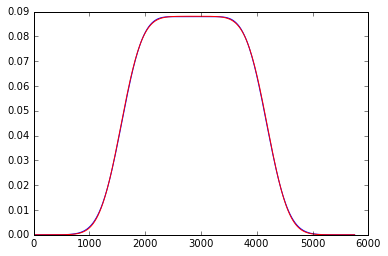

In [56]:
plot(zz,Stern_Gerlah_fit_numction(zz,*popt))
plot(zz,yy2,'r')

Numerical summation of displacenent for a given dB(t)=dBB. Here dBB is exponentially growing, can be just a recorded wavform

In [11]:
def exp_grouth(x,x0,sigma,x_max):
    return x_max*(1 - exp(-(x - x0)/sigma))
tt = linspace(0,10e-3,1000)
dBB  = exp_grouth(tt,0,3e-3,40e-2)
m=1
aa = g*m_b*dBB*m/m_Tm
vv = (tt[1]-tt[0])*aa.cumsum()
xx1 = (tt[1]-tt[0])*vv.cumsum()

Integration with sympy

In [12]:
import sympy as sp

In [13]:
t, τ = sp.symbols('t,τ')

In [ ]:
i1 = sp.integrate(1 - sp.exp(-t/τ),(t,0,t))
i2 = sp.integrate(i1, (t,0,t))
i2

In [ ]:
# to subscribe some value
i2.subs(τ,2)